Player_0 X co-ordinate = 14
Player_0 Y co-ordinate = 11


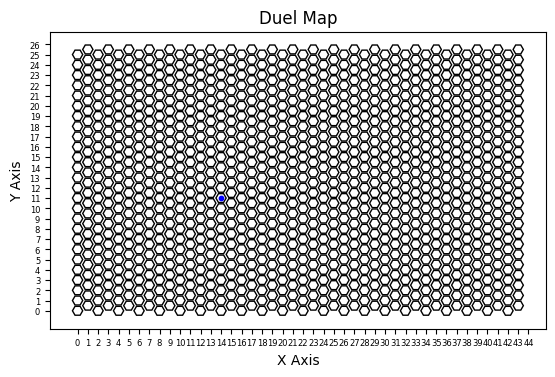

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from matplotlib.patches import RegularPolygon

# Find player 0 co-ordinatres
# Assume you have a file named 'example.txt' with some text in it

# # Using the 'with' statement to open and read the file
# with open('C:\\Users\\User\\AppData\\Local\\Firaxis Games\\Sid Meier\'s Civilization VI\\Logs\\Lua.log', 'r') as file:
#     Lua_content = file.read()  # Reads the entire file content into a string
#     #print(Lua_content)

player_0_X_start = 0
player_0_Y_start = 0

def is_odd(n):
    return n % 2 == 1


# Searching for a specific string within the file content
player_coord_start_string = "Map Script: Major Start X:"

with open('C:\\Users\\User\\AppData\\Local\\Firaxis Games\\Sid Meier\'s Civilization VI\\Logs\\Lua.log', 'r') as file:
    for line in file:  # Iterating through each line in the file
        if line.startswith(player_coord_start_string):
            pattern = r"Major Start X:\s*(\d+)"
            match = re.search(pattern, line)
            if match:
                # Extracting the first group, which contains the digits following "Major Start X:"
                Xnumber = match.group(1)
                player_0_X_start = int(Xnumber)
                print(f"Player_0 X co-ordinate = {Xnumber}")
            else:
                print("The X co-ordinate was not found in the line.")

            if line.startswith(player_coord_start_string):
                pattern = r"Major Start Y:\s*(\d+)"
                match = re.search(pattern, line)
                if match:#
                    # Extracting the first group, which contains the digits following "Major Start Y:"
                    Ynumber = match.group(1)
                    player_0_Y_start = int(Ynumber)
                    print(f"Player_0 Y co-ordinate = {Ynumber}")
                else:
                    print("The Y co-ordinate was not found in the line.")
                break
                    

if is_odd(player_0_X_start):
    player_0_Y_start = player_0_Y_start + 0.5

player_0_start = (Xnumber,Ynumber)

def plot_hexagon_grid(rows, cols, hex_size=0.5, dot_info=None):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    # Radius of a circumscribed circle around a hexagon
    radius = hex_size

    # Distance between centers of two adjacent hexagons horizontally and vertically
    dx = 1
    dy = 1

    # Loop to create hexagons
    for row in range(rows):
        for col in range(cols):
            # Calculate the center position
            x = col * dx
            y = row * dy

            # Adjust every other row to interlock the hexagons
            if col % 2 == 1:
                y += dy / 2

            hexagon = RegularPolygon((x, y), numVertices=6, radius=radius, orientation=np.radians(30), edgecolor='k', facecolor='none')
            ax.add_patch(hexagon)

    # Plotting dots with specified coordinates and colors
    if dot_info is not None:
        for dot in dot_info:
            plt.scatter(dot[0], dot[1], color=dot[2], s=10)  # dot[0] and dot[1] are x and y coordinates, dot[2] is the color

# X and Y ticks
    x = range(0, 45)  # X values from 0 to 16
    y = range(0, 27)  # Y values as squares of X values
    plt.xticks(range(min(x), max(x)+1, 1), fontsize=6)
    plt.yticks(range(min(y), max(y) + 1, 1), fontsize=6)



    plt.xlabel('X Axis')  # X-axis label
    plt.ylabel('Y Axis')  # Y-axis label
    plt.title('Duel Map')  # Plot title
    plt.show()

# Plot a grid of hexagons and two dots with specified colors
#plot_hexagon_grid(15, 15, dot_info=[(, 0, 'blue')])

plot_hexagon_grid(26, 44, dot_info=[(player_0_X_start, player_0_Y_start, 'blue')])
